<a href="https://colab.research.google.com/github/LucasCalbucuraZ/MOS/blob/main/validaMOSAWRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DESCRIPCIÓN: SERIES DE TIEMPO, DIAGRAMAS DE DISPERSIÓN Y DIAGRAMAS DE VIOLIN DE LA TEMPERATURA A 2 METROS OBSERVADA Y SIMULADA CON MOSA-WRF
# ADEMÁS DE UN HISTOGRAMA CON LAS DIFERENCIAS (DATOS DIARIOS DESDE EL 1 DE AGOSTO DE 2018 HASTA EL 1 DE AGOSTO DE 2021)

# AUTOR: Lucas Calbucura Zúñiga. Lcalbucura2017@udec.cl

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib import style
import seaborn as sns
import datetime
from datetime import datetime, timedelta

# Utilidades
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Cargamos los 1097 datos diarios desde GitHub, es importante que los archivos estén en formato .csv
# Hasta el momento se tienen las variables T2, T2_WRF, P_WRF, U10_WRF, V10_WRF (promedio, máximo y mínimo para c/u)
APIAO_diario = pd.read_csv('https://raw.githubusercontent.com/AndresSepulveda/PHP_LucasC/main/Datos/APIAO_diario.csv') 
APIAO_diario = APIAO_diario.drop(['Time'], axis=1)
CUCAO_diario = pd.read_csv('https://raw.githubusercontent.com/AndresSepulveda/PHP_LucasC/main/Datos/CUCAO_diario.csv')
CUCAO_diario = CUCAO_diario.drop(['Time'], axis=1)
MELINKA_diario = pd.read_csv('https://raw.githubusercontent.com/AndresSepulveda/PHP_LucasC/main/Datos/MELINKA_diario.csv')
MELINKA_diario = MELINKA_diario.drop(['Time'], axis=1)

# Creamos el vector fecha 
t = np.arange(np.datetime64('2018-08-01'), np.datetime64('2021-08-02'))
time= pd.to_datetime(t)

# MELINKA_diario["Mean_WRF"].isnull().sum().sum() #para revisar los NaN
# Interpolamos los datos faltantes. Por ahora solo compararemos T2 observada vs T2 simulada con MOSA-WRF.
T2_WRF_Mean=APIAO_diario["T2_WRF_mean"].interpolate(method='polynomial',order=2); APIAO_diario["T2_WRF_mean"]=T2_WRF_Mean.to_frame()
T2_WRF_Max=APIAO_diario["T2_WRF_max"].interpolate(method='polynomial',order=2); APIAO_diario["T2_WRF_max"]=T2_WRF_Max.to_frame()
T2_WRF_Min=APIAO_diario["T2_WRF_min"].interpolate(method='polynomial',order=2); APIAO_diario["T2_WRF_min"]=T2_WRF_Min.to_frame()
del T2_WRF_Mean; del T2_WRF_Max; del T2_WRF_Min;

T2_WRF_Mean=CUCAO_diario["T2_WRF_mean"].interpolate(method='polynomial',order=2); CUCAO_diario["T2_WRF_mean"]=T2_WRF_Mean.to_frame()
T2_WRF_Max=CUCAO_diario["T2_WRF_max"].interpolate(method='polynomial',order=2); CUCAO_diario["T2_WRF_max"]=T2_WRF_Max.to_frame()
T2_WRF_Min=CUCAO_diario["T2_WRF_min"].interpolate(method='polynomial',order=2); CUCAO_diario["T2_WRF_min"]=T2_WRF_Min.to_frame()

del T2_WRF_Mean; del T2_WRF_Max; del T2_WRF_Min;
T2_WRF_Mean=MELINKA_diario["T2_WRF_mean"].interpolate(method='polynomial',order=2); MELINKA_diario["T2_WRF_mean"]=T2_WRF_Mean.to_frame()
T2_WRF_Max=MELINKA_diario["T2_WRF_max"].interpolate(method='polynomial',order=2); MELINKA_diario["T2_WRF_max"]=T2_WRF_Max.to_frame()
T2_WRF_Min=MELINKA_diario["T2_WRF_min"].interpolate(method='polynomial',order=2); MELINKA_diario["T2_WRF_min"]=T2_WRF_Min.to_frame()
del T2_WRF_Mean; del T2_WRF_Max; del T2_WRF_Min;

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# SERIES DE TIEMPO PARA LOS PROMEDIOS DIARIOS
# ======================================================================================
fig, ax = plt.subplots(3,figsize=(25,12), sharex=True)
fig.suptitle('Promedios diarios - Temperatura del aire a 2 metros',x=0.5,y=0.994,fontsize=24)
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22) 
# APIAO
ax[0].plot(time,APIAO_diario["T2_mean"],color='navy',linewidth=3,label='OBS') #Observado
ax[0].plot(time,APIAO_diario["T2_WRF_mean"],color='goldenrod',linewidth=3,label='WRF') #Simulado 
ax[0].plot(time,APIAO_diario["T2_mean"]-APIAO_diario["T2_WRF_mean"],color='darkred',linewidth=3,label='DIF') #Diferencia
ax[0].set_ylabel('[°C]', fontsize=22, weight='bold')
ax[0].set_ylim(-7,25)
ax[0].yaxis.set_major_locator(loc)
ax[0].yaxis.set_minor_locator(loc)
ax[0].set_title('APIAO',fontsize=22,x=0.037, y=1, weight='bold')
ax[0].grid(True)
ax[0].annotate("r=0.96  RMSE=0.7", xy=(0.86, 1.04), xycoords=ax[0].transAxes,fontsize=22)
ax[0].legend(fontsize=22,loc='upper right',bbox_to_anchor=(1.044, 1.045))
# CUCAO
ax[1].plot(time,CUCAO_diario["T2_mean"],color='navy',linewidth=3) #Observado
ax[1].plot(time,CUCAO_diario["T2_WRF_mean"],color='goldenrod',linewidth=3) #Simulado 
ax[1].plot(time,CUCAO_diario["T2_mean"]-CUCAO_diario["T2_WRF_mean"],color='darkred',linewidth=3) #Diferencia
ax[1].set_ylabel('[°C]', fontsize = 22, weight='bold')
ax[1].set_ylim(-7,25)
ax[1].yaxis.set_major_locator(loc)
ax[1].set_title('CUCAO',fontsize=22,x=0.037, y=1, weight='bold')
ax[1].grid(True)
ax[1].annotate("r=0.88  RMSE=1.5", xy=(0.86, 1.04), xycoords=ax[1].transAxes,fontsize=22)
# MELINKA
ax[2].plot(time,MELINKA_diario["T2_mean"],color='navy',linewidth=3) #Observado
ax[2].plot(time,MELINKA_diario["T2_WRF_mean"],color='goldenrod',linewidth=3) #Simulado 
ax[2].plot(time,MELINKA_diario["T2_mean"]-MELINKA_diario["T2_WRF_mean"],color='darkred',linewidth=3) #Diferencia
ax[2].set_xlabel('Fecha', fontsize = 22, weight='bold')
ax[2].set_ylabel('[°C]', fontsize = 22, weight='bold')
ax[2].set_ylim(-7,25)
ax[2].yaxis.set_major_locator(loc)
ax[2].set_title('MELINKA',fontsize=22,x=0.045, y=1, weight='bold')
ax[2].grid(True)
ax[2].annotate("r=0.94  RMSE=2.6", xy=(0.86, 1.04), xycoords=ax[2].transAxes,fontsize=22)
fig.tight_layout()
plt.savefig("T2_mean.png")

NameError: ignored

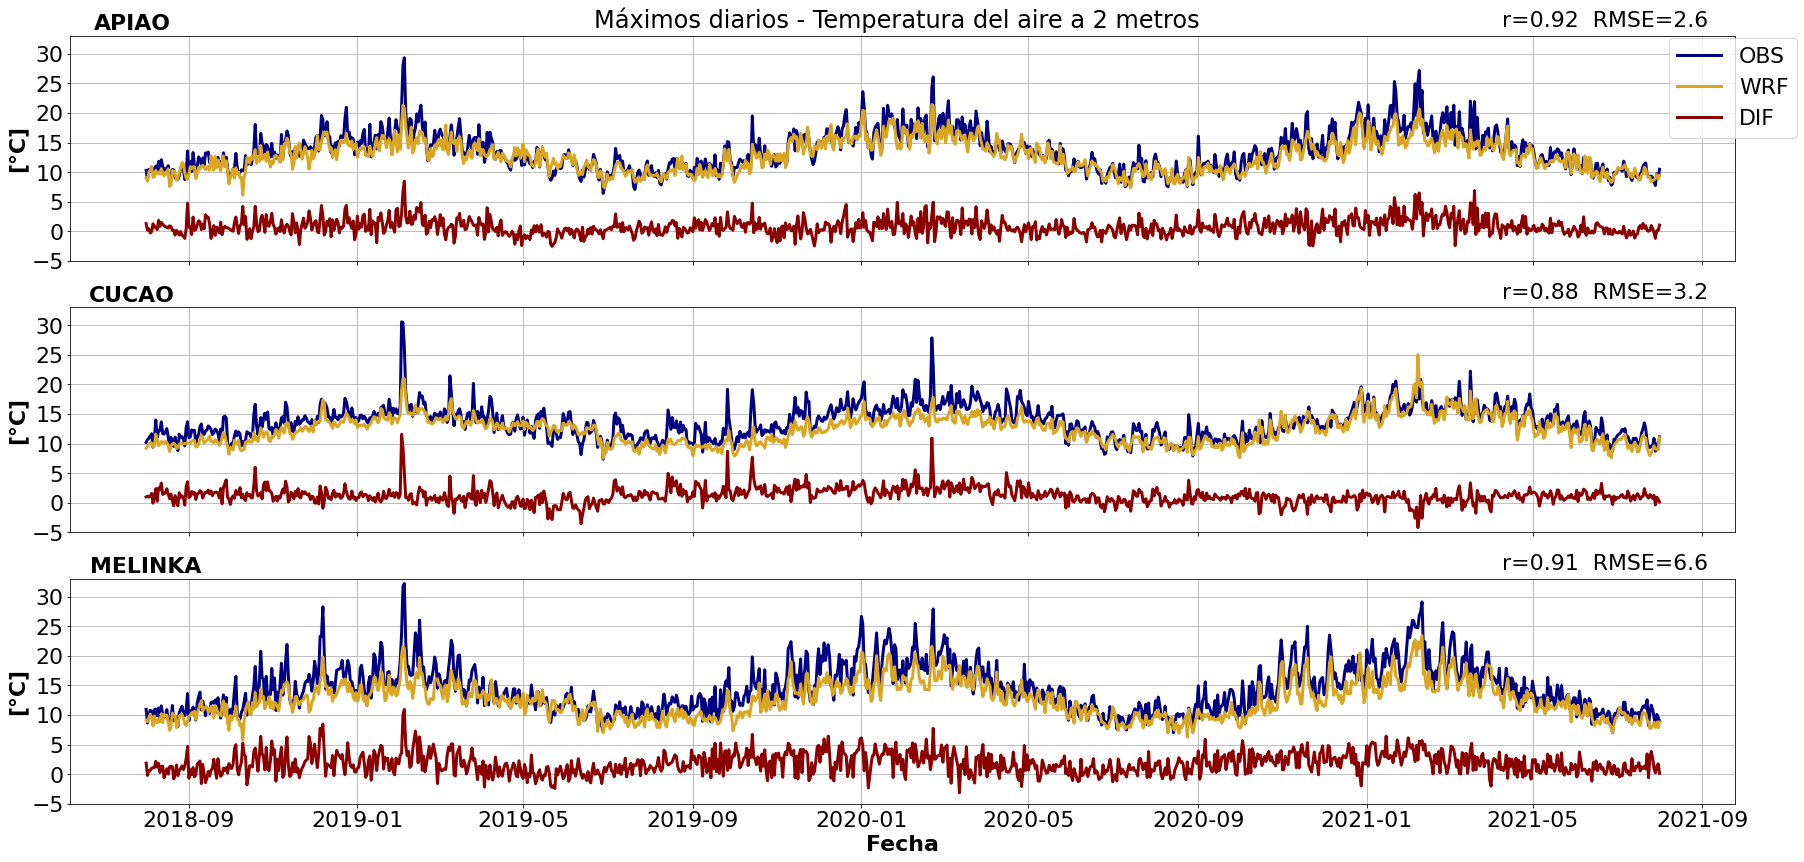

In [ ]:
# SERIES DE TIEMPO PARA LOS MÁXIMOS DIARIOS
# ======================================================================================
fig, ax = plt.subplots(3,figsize=(25,12),sharex=True)
fig.suptitle('Máximos diarios - Temperatura del aire a 2 metros',x=0.5,y=0.994,fontsize=24)
# APIAO
ax[0].plot(time,APIAO_diario["T2_max"],color='navy',linewidth=3,label='OBS')
ax[0].plot(time,APIAO_diario["T2_WRF_max"],color='goldenrod',linewidth=3,label='WRF')
ax[0].plot(time,APIAO_diario["T2_max"]-APIAO_diario["T2_WRF_max"],color='darkred',linewidth=3,label='DIF')
ax[0].set_ylabel('[°C]', fontsize=22, weight='bold')
ax[0].set_ylim(-5,33)
ax[0].yaxis.set_major_locator(loc)
ax[0].set_title('APIAO',fontsize=22,x=0.037, y=1, weight='bold')
ax[0].grid(True)
ax[0].annotate("r=0.92  RMSE=2.6", xy=(0.86, 1.04), xycoords=ax[0].transAxes,fontsize=22)
ax[0].legend(fontsize=22,loc='upper right',bbox_to_anchor=(1.044, 1.04))
# CUCAO
ax[1].plot(time,CUCAO_diario["T2_max"],color='navy',linewidth=3)
ax[1].plot(time,CUCAO_diario["T2_WRF_max"],color='goldenrod',linewidth=3)
ax[1].plot(time,CUCAO_diario["T2_max"]-CUCAO_diario["T2_WRF_max"],color='darkred',linewidth=3)
ax[1].set_ylabel('[°C]', fontsize = 22, weight='bold')
ax[1].set_ylim(-5,33)
ax[1].yaxis.set_major_locator(loc)
ax[1].set_title('CUCAO',fontsize=22,x=0.037, y=1, weight='bold')
ax[1].grid(True)
ax[1].annotate("r=0.88  RMSE=3.2", xy=(0.86, 1.04), xycoords=ax[1].transAxes,fontsize=22)
# MELINKA
ax[2].plot(time,MELINKA_diario["T2_max"],color='navy',linewidth=3)
ax[2].plot(time,MELINKA_diario["T2_WRF_max"],color='goldenrod',linewidth=3)
ax[2].plot(time,MELINKA_diario["T2_max"]-MELINKA_diario["T2_WRF_max"],color='darkred',linewidth=3)
ax[2].set_xlabel('Fecha', fontsize = 22, weight='bold')
ax[2].set_ylabel('[°C]', fontsize = 22, weight='bold')
ax[2].set_ylim(-5,33)
ax[2].yaxis.set_major_locator(loc)
ax[2].set_title('MELINKA',fontsize=22,x=0.045, y=1, weight='bold')
ax[2].grid(True)
ax[2].annotate("r=0.91  RMSE=6.6", xy=(0.86, 1.04), xycoords=ax[2].transAxes,fontsize=22)
fig.tight_layout()
plt.savefig("T2_max.png")

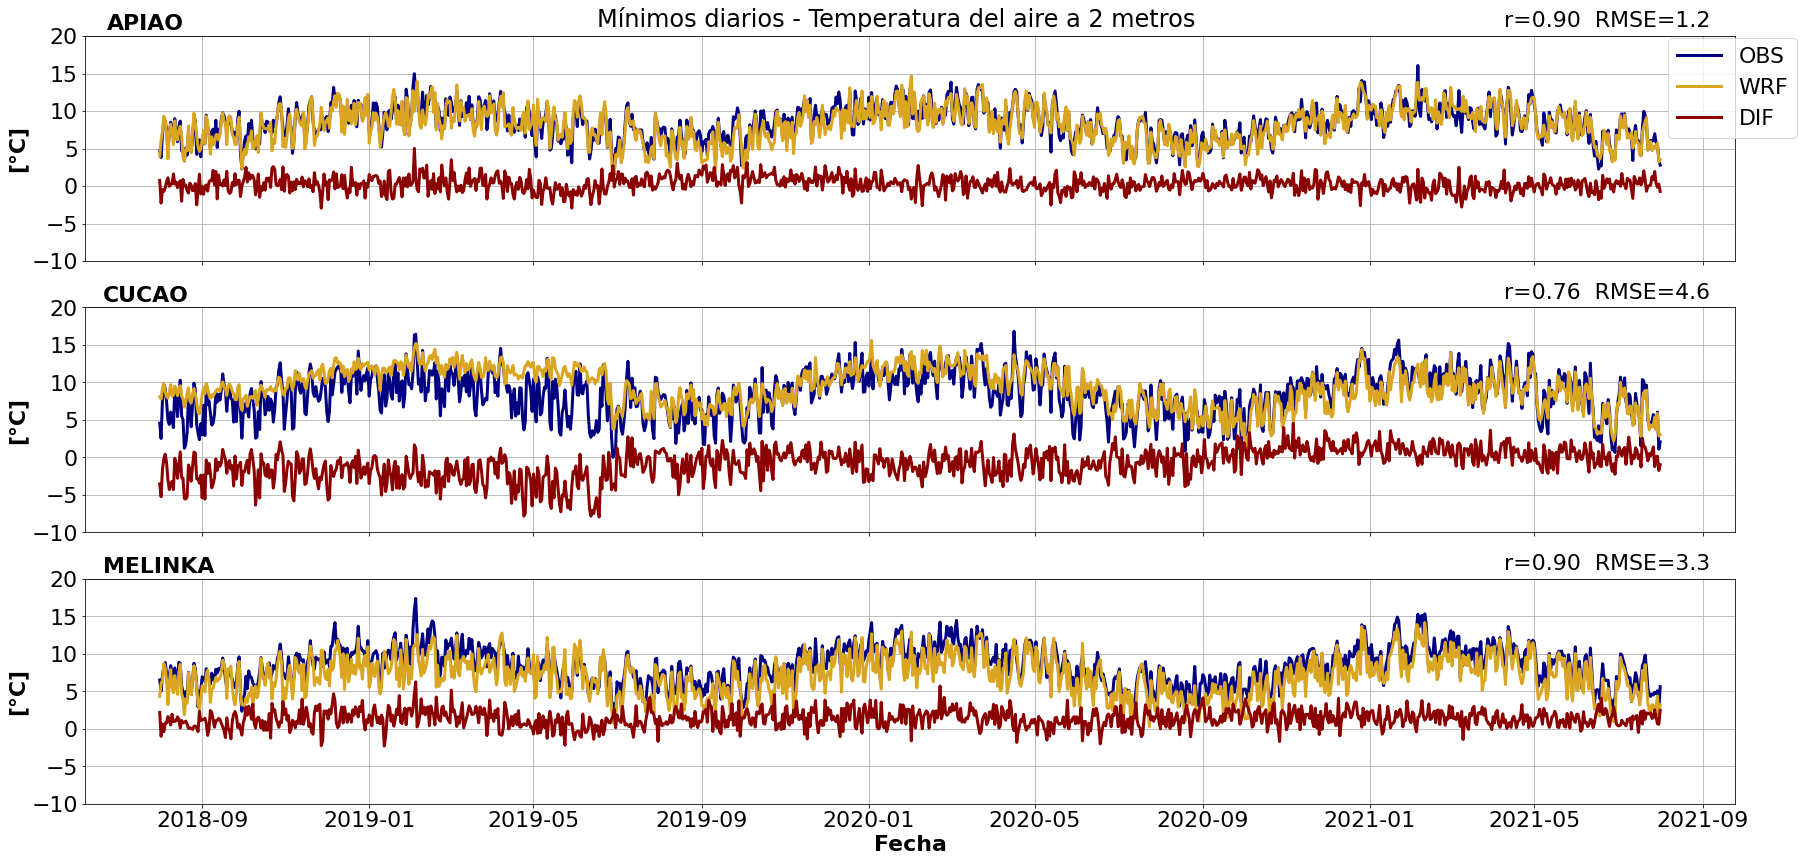

In [ ]:
# SERIES DE TIEMPO PARA LOS MÍNIMOS DIARIOS
# ======================================================================================
fig, ax = plt.subplots(3,figsize=(25,12),sharex=True)
fig.suptitle('Mínimos diarios - Temperatura del aire a 2 metros',x=0.5,y=0.994,fontsize=24)
# APIAO
ax[0].plot(time,APIAO_diario["T2_min"],color='navy',linewidth=3,label='OBS') # Observado 
ax[0].plot(time,APIAO_diario["T2_WRF_min"],color='goldenrod',linewidth=3,label='WRF') # Simulado 
ax[0].plot(time,APIAO_diario["T2_min"]-APIAO_diario["T2_WRF_min"],color='darkred',linewidth=3,label='DIF') # Diferencia
ax[0].set_ylabel('[°C]', fontsize=22, weight='bold')
ax[0].set_ylim(-10,20)
ax[0].yaxis.set_major_locator(loc)
ax[0].set_title('APIAO',fontsize=22,x=0.037, y=1, weight='bold')
ax[0].grid(True)
ax[0].annotate("r=0.90  RMSE=1.2", xy=(0.86, 1.04), xycoords=ax[0].transAxes,fontsize=22)
ax[0].legend(fontsize=22,loc='upper right',bbox_to_anchor=(1.044, 1.04))
# CUCAO
ax[1].plot(time,CUCAO_diario["T2_min"],color='navy',linewidth=3) # Observado 
ax[1].plot(time,CUCAO_diario["T2_WRF_min"],color='goldenrod',linewidth=3) # Simulado 
ax[1].plot(time,CUCAO_diario["T2_min"]-CUCAO_diario["T2_WRF_min"],color='darkred',linewidth=3) # Diferencia
ax[1].set_ylabel('[°C]', fontsize = 22, weight='bold')
ax[1].set_ylim(-10,20)
ax[1].yaxis.set_major_locator(loc)
ax[1].set_title('CUCAO',fontsize=22,x=0.037, y=1, weight='bold')
ax[1].annotate("r=0.76  RMSE=4.6", xy=(0.86, 1.04), xycoords=ax[1].transAxes,fontsize=22)
ax[1].grid(True)
# MELINKA
ax[2].plot(time,MELINKA_diario["T2_min"],color='navy',linewidth=3) # Observado 
ax[2].plot(time,MELINKA_diario["T2_WRF_min"],color='goldenrod',linewidth=3) # Simulado
ax[2].plot(time,MELINKA_diario["T2_min"]-MELINKA_diario["T2_WRF_min"],color='darkred',linewidth=3) # Diferencia
ax[2].set_xlabel('Fecha', fontsize = 22, weight='bold')
ax[2].set_ylabel('[°C]', fontsize = 22, weight='bold')
ax[2].set_ylim(-10,20)
ax[2].yaxis.set_major_locator(loc)
ax[2].set_title('MELINKA',fontsize=22,x=0.045, y=1, weight='bold')
ax[2].annotate("r=0.90  RMSE=3.3", xy=(0.86, 1.04), xycoords=ax[2].transAxes,fontsize=22)
ax[2].grid(True)
fig.tight_layout()
plt.savefig("T2_min.png")

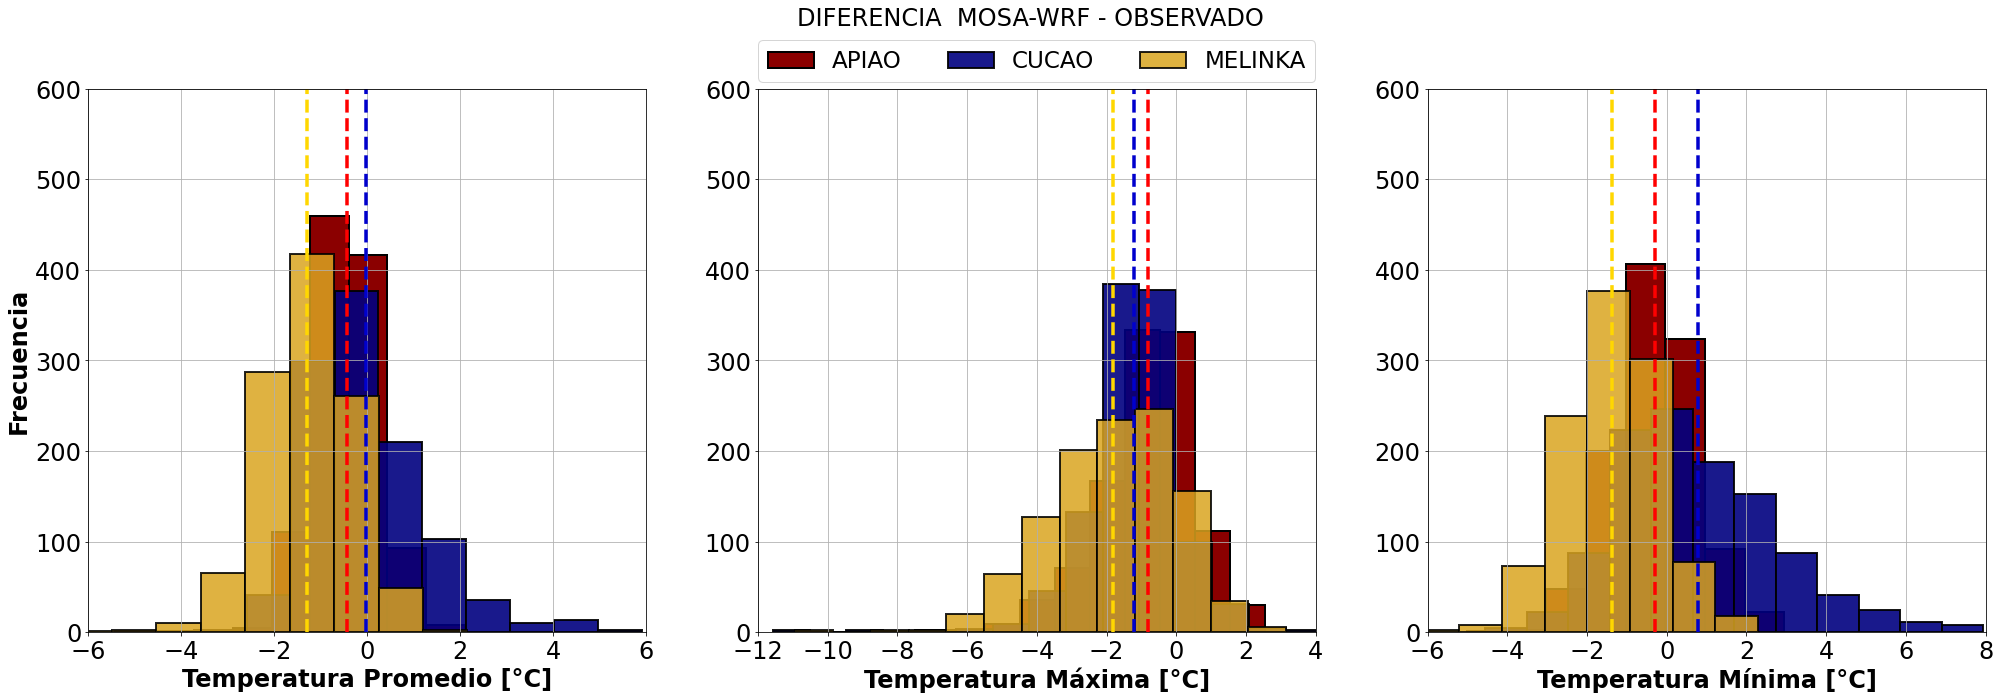

In [ ]:
# HISTOGRAMA DE LAS DIFERENCIAS
# ======================================================================================    
fig, ax = plt.subplots(1,3,figsize=(34,10),sharey=True)
fig.suptitle('DIFERENCIA  MOSA-WRF - OBSERVADO',x=0.51,y=0.994,fontsize=24)

plt.subplot(1,3,1) # DIFERENCIA TEMPERATURA PROMEDIO
plt.hist(APIAO_diario['T2_WRF_mean']-APIAO_diario['T2_mean'], bins = 8,color = "darkred",edgecolor='k',alpha=1,linewidth=2,label='APIAO')
plt.axvline((APIAO_diario['T2_WRF_mean']-APIAO_diario['T2_mean']).mean(), color='red', linestyle='dashed', linewidth=3.5)
plt.hist(CUCAO_diario['T2_WRF_mean']-CUCAO_diario['T2_mean'], bins = 12,color = "navy",edgecolor='k',alpha=0.90,linewidth=2,label='CUCAO')
plt.axvline((CUCAO_diario['T2_WRF_mean']-CUCAO_diario['T2_mean']).mean(), color='mediumblue', linestyle='dashed', linewidth=3.5)
plt.hist(MELINKA_diario['T2_WRF_mean']-MELINKA_diario['T2_mean'], bins = 10,color = "goldenrod",edgecolor='k',alpha=0.85,linewidth=2,label='MELINKA')
plt.axvline((MELINKA_diario['T2_WRF_mean']-MELINKA_diario['T2_mean']).mean(), color='gold', linestyle='dashed', linewidth=3.5)
plt.xlabel('Temperatura Promedio [°C]', fontsize=24, weight='bold')
plt.ylabel('Frecuencia', fontsize=24, weight='bold')
plt.ylim(0,600); plt.xlim(-6,6) ; plt.legend(bbox_to_anchor=(2.2195, 1.11),fontsize=23,ncol=3)
plt.xticks(fontsize=24);  plt.yticks(fontsize=24);  plt.grid(True)
plt.subplot(1,3,2) # DIFERENCIA TEMPERATURA MÁXIMA
plt.hist(APIAO_diario['T2_WRF_max']-APIAO_diario['T2_max'], bins = 11,color = "darkred",edgecolor='k',alpha=1,linewidth=2,label='APIAO')
plt.axvline((APIAO_diario['T2_WRF_max']-APIAO_diario['T2_max']).mean(), color='red', linestyle='dashed', linewidth=3.5)
plt.hist(CUCAO_diario['T2_WRF_max']-CUCAO_diario['T2_max'], bins = 15,color = "navy",edgecolor='k',alpha=0.90,linewidth=2,label='CUCAO')
plt.axvline((CUCAO_diario['T2_WRF_max']-CUCAO_diario['T2_max']).mean(), color='mediumblue', linestyle='dashed', linewidth=3.5)
plt.hist(MELINKA_diario['T2_WRF_max']-MELINKA_diario['T2_max'], bins = 13,color = "goldenrod",edgecolor='k',alpha=0.85,linewidth=2,label='MELINKA')
plt.axvline((MELINKA_diario['T2_WRF_max']-MELINKA_diario['T2_max']).mean(), color='gold', linestyle='dashed', linewidth=3.5)
plt.xlabel('Temperatura Máxima [°C]', fontsize=24, weight='bold')
plt.ylim(0,600);   plt.xlim(-12,4);    plt.xticks(fontsize=24);   plt.yticks(fontsize=24);   plt.grid(True)
plt.subplot(1,3,3) # DIFERENCIA TEMPERATURA MÍNIMA
plt.hist(APIAO_diario['T2_WRF_min']-APIAO_diario['T2_min'], bins = 8,color = "darkred",edgecolor='k',alpha=1,linewidth=2,label='APIAO')
plt.axvline((APIAO_diario['T2_WRF_min']-APIAO_diario['T2_min']).mean(), color='red', linestyle='dashed', linewidth=3.5)
plt.hist(CUCAO_diario['T2_WRF_min']-CUCAO_diario['T2_min'], bins = 12,color = "navy",edgecolor='k',alpha=0.90,linewidth=2,label='CUCAO')
plt.axvline((CUCAO_diario['T2_WRF_min']-CUCAO_diario['T2_min']).mean(), color='mediumblue', linestyle='dashed', linewidth=3.5)
plt.hist(MELINKA_diario['T2_WRF_min']-MELINKA_diario['T2_min'], bins = 8,color = "goldenrod",edgecolor='k',alpha=0.85,linewidth=2,label='MELINKA')
plt.axvline((MELINKA_diario['T2_WRF_min']-MELINKA_diario['T2_min']).mean(), color='gold', linestyle='dashed', linewidth=3.5)
plt.xlabel('Temperatura Mínima [°C]', fontsize=24, weight='bold')
plt.ylim(0,600);   plt.xlim(-6,8);   plt.xticks(fontsize=24);   plt.yticks(fontsize=24);   plt.grid(True)
plt.savefig("Hist_diferencias.png")

In [ ]:
# REGRESIÓN LINEAL PARA OBTENER CURVA AJUSTADA Y PARÁMETROS ASOCIADOS [R2, m, n, etc]
# T2 OBSERVADA VS T2 SIMULADA CON MOSA-WRF
# ======================================================================================
# PROMEDIO DIARIO 
APIAO_Mean = APIAO_diario['T2_mean'].values.reshape(-1,1); APIAO_MeanWRF = APIAO_diario['T2_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(APIAO_Mean, APIAO_MeanWRF)
APIAO_MeanWRF_pred = linear_regressor.predict(APIAO_Mean);  del APIAO_MeanWRF; del linear_regressor; 
CUCAO_Mean = CUCAO_diario['T2_mean'].values.reshape(-1,1); CUCAO_MeanWRF = CUCAO_diario['T2_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(CUCAO_Mean, CUCAO_MeanWRF)
CUCAO_MeanWRF_pred = linear_regressor.predict(CUCAO_Mean); del CUCAO_MeanWRF; del linear_regressor; 
MELINKA_Mean = MELINKA_diario['T2_mean'].values.reshape(-1,1); MELINKA_MeanWRF = MELINKA_diario['T2_WRF_mean'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(MELINKA_Mean, MELINKA_MeanWRF)
MELINKA_MeanWRF_pred = linear_regressor.predict(MELINKA_Mean); del MELINKA_MeanWRF; del linear_regressor; 
# ======================================================================================
# MÁXIMO DIARIO 
APIAO_Max = APIAO_diario['T2_max'].values.reshape(-1,1); APIAO_MaxWRF = APIAO_diario['T2_WRF_max'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(APIAO_Max, APIAO_MaxWRF)
APIAO_MaxWRF_pred = linear_regressor.predict(APIAO_Max); del APIAO_MaxWRF; del linear_regressor; 
CUCAO_Max = CUCAO_diario['T2_max'].values.reshape(-1,1); CUCAO_MaxWRF = CUCAO_diario['T2_WRF_max'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(CUCAO_Max, CUCAO_MaxWRF)
CUCAO_MaxWRF_pred = linear_regressor.predict(CUCAO_Max); del CUCAO_MaxWRF; del linear_regressor; 
MELINKA_Max = MELINKA_diario['T2_max'].values.reshape(-1,1); MELINKA_MaxWRF = MELINKA_diario['T2_WRF_max'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(MELINKA_Max, MELINKA_MaxWRF)
MELINKA_MaxWRF_pred = linear_regressor.predict(MELINKA_Max); del MELINKA_MaxWRF; del linear_regressor; 
# ======================================================================================
# MÍNIMO DIARIO 
APIAO_Min = APIAO_diario['T2_min'].values.reshape(-1,1); APIAO_MinWRF = APIAO_diario['T2_WRF_min'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(APIAO_Min, APIAO_MinWRF)
APIAO_MinWRF_pred = linear_regressor.predict(APIAO_Min); del APIAO_MinWRF; del linear_regressor;
CUCAO_Min = CUCAO_diario['T2_min'].values.reshape(-1,1); CUCAO_MinWRF = CUCAO_diario['T2_WRF_min'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(CUCAO_Min, CUCAO_MinWRF)
CUCAO_MinWRF_pred = linear_regressor.predict(CUCAO_Min); del CUCAO_MinWRF; del linear_regressor; 
MELINKA_Min = MELINKA_diario['T2_min'].values.reshape(-1,1); MELINKA_MinWRF = MELINKA_diario['T2_WRF_min'].values.reshape(-1,1)
linear_regressor = LinearRegression(); linear_regressor.fit(MELINKA_Min, MELINKA_MinWRF)
MELINKA_MinWRF_pred = linear_regressor.predict(MELINKA_Min); del MELINKA_MinWRF; del linear_regressor; 

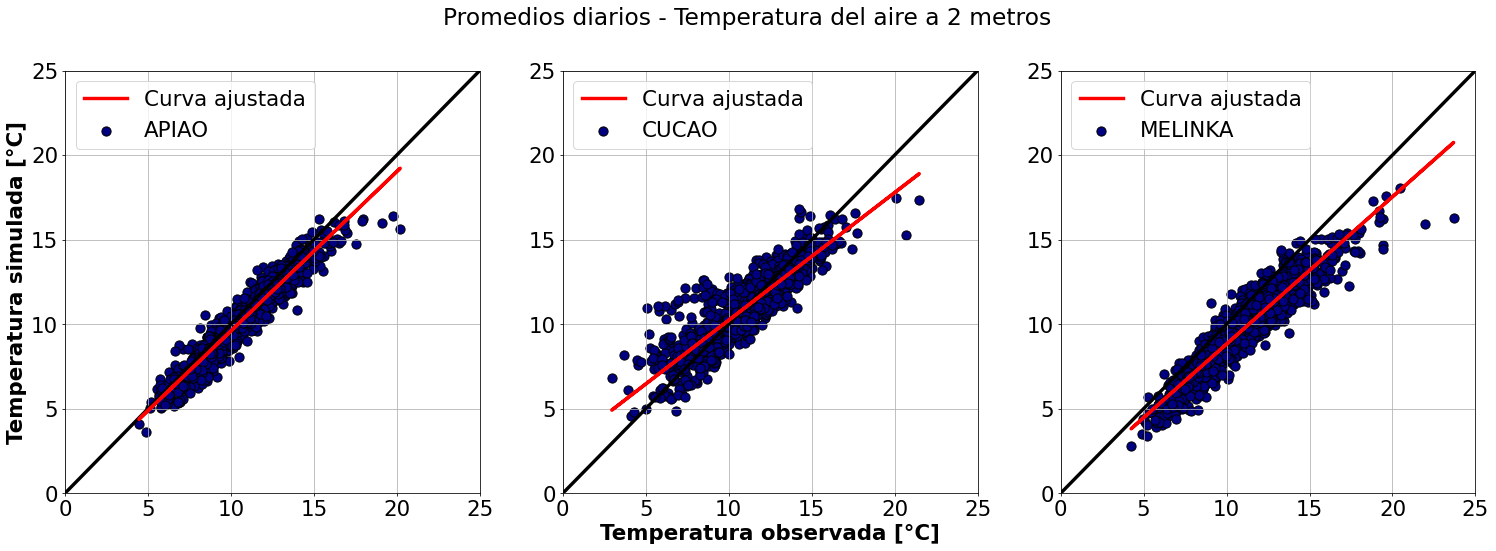

In [ ]:
# DIAGRAMAS DE DISPERSIÓN PARA LOS PROMEDIOS DIARIOS
# ======================================================================================
fig, ax = plt.subplots(1,3,figsize=(26,8),dpi=70)
fig.suptitle('Promedios diarios - Temperatura del aire a 2 metros',x=0.5,y=0.994,fontsize=24)
# APIAO
ax[0].scatter(APIAO_diario["T2_mean"], APIAO_diario["T2_WRF_mean"], s=90, color='navy', edgecolor='k',label='APIAO'); # Observado vs simulado
ax[0].plot([0,5,10,15,20,25],[0,5,10,15,20,25],color='black',linewidth=3.5)
ax[0].plot(APIAO_Mean, APIAO_MeanWRF_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[0].set_ylabel('Temperatura simulada [°C]', fontsize = 22, weight='bold')
ax[0].legend(fontsize=22,loc='upper left')
ax[0].yaxis.set_major_locator(loc)
ax[0].set_xlim(0,25);   ax[0].set_ylim(0,25);   ax[0].grid(True)
# CUCAO
ax[1].scatter(CUCAO_diario["T2_mean"], CUCAO_diario["T2_WRF_mean"], s=90, color='navy', edgecolor='k',label='CUCAO'); # Observado vs simulado
ax[1].plot([0,5,10,15,20,25],[0,5,10,15,20,25],color='black',linewidth=3.5)
ax[1].plot(CUCAO_Mean, CUCAO_MeanWRF_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[1].set_xlabel('Temperatura observada [°C]', fontsize = 22, weight='bold')
ax[1].legend(fontsize=22,loc='upper left')
ax[1].yaxis.set_major_locator(loc)
ax[1].set_xlim(0,25) ;   ax[1].set_ylim(0,25);   ax[1].grid(True)
# MELINKA
ax[2].scatter(MELINKA_diario["T2_mean"], MELINKA_diario["T2_WRF_mean"], s=90, color='navy', edgecolor='k',label='MELINKA'); # Observado vs simulado
ax[2].plot([0,5,10,15,20,25],[0,5,10,15,20,25],color='black',linewidth=3.5)
ax[2].plot(MELINKA_Mean, MELINKA_MeanWRF_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[2].legend(fontsize=22,loc='upper left')
ax[2].yaxis.set_major_locator(loc)
ax[2].set_xlim(0,25);   ax[2].set_ylim(0,25);   ax[2].grid(True)
plt.savefig("scatterplot_mean.png")

\begin{array}{|c|c|c|c|c|c|} \hline
\text{Promedio diario (T2)} & \text{Pendiente } (m) & \text{Intercepto } (n) & \text{Coeficiente de determinación } (R^2) & RMSE & BIAS \\ \hline \hline
\text{APIAO} & 0.94 & 0.2 & 0.89 & 0.7 & -0.4 \\
\text{CUCAO} & 0.75 & 2.7 & 0.78 & 1.5 & 0\\
\text{MELINKA} & 0.87 & 0.1 & 0.68 & 2.6 & -1.3 \\ \hline 
\end{array}

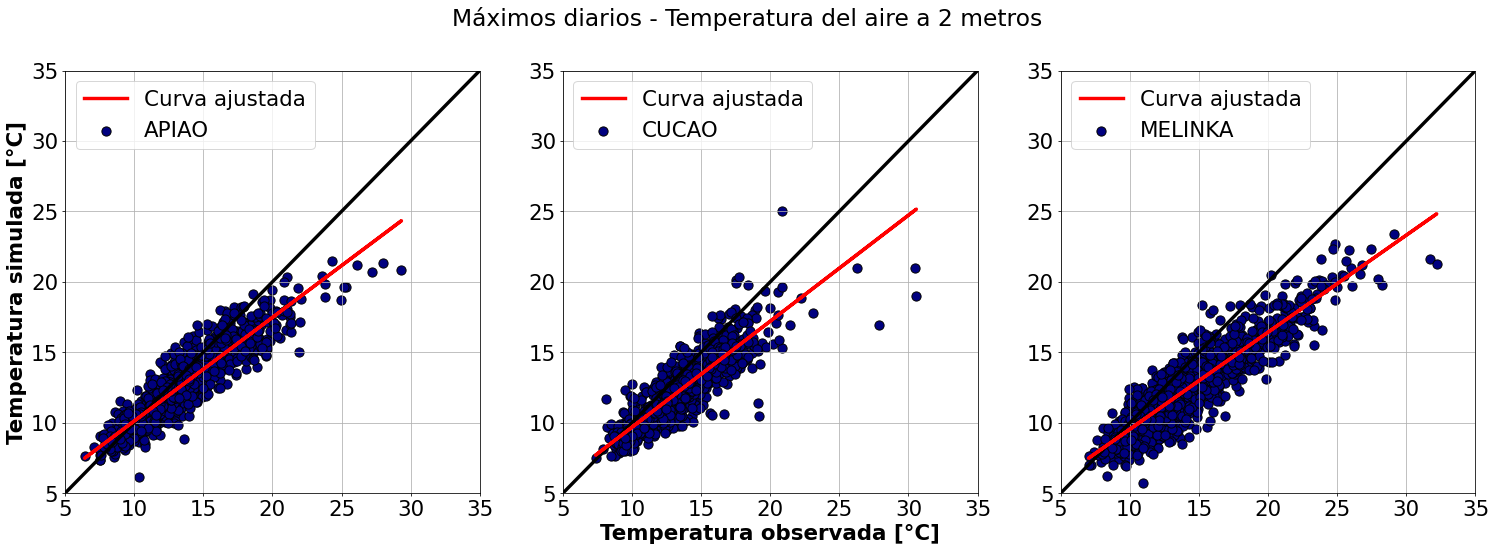

In [ ]:
# DIAGRAMAS DE DISPERSIÓN PARA LOS MÁXIMOS DIARIOS
# ======================================================================================
fig, ax = plt.subplots(1,3,figsize=(26,8),dpi=70)
fig.suptitle('Máximos diarios - Temperatura del aire a 2 metros',x=0.5,y=0.994,fontsize=24)
# APIAO
ax[0].scatter(APIAO_diario["T2_max"], APIAO_diario["T2_WRF_max"], s=90, color='navy', edgecolor='k',label='APIAO'); # Observado vs simulado
ax[0].plot([5,10,15,20,25,30,35],[5,10,15,20,25,30,35],color='black',linewidth=3.5)
ax[0].plot(APIAO_Max, APIAO_MaxWRF_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[0].set_ylabel('Temperatura simulada [°C]', fontsize = 22, weight='bold')
ax[0].legend(fontsize=22,loc='upper left')
ax[0].yaxis.set_major_locator(loc)
ax[0].set_xlim(5,35);   ax[0].set_ylim(5,35);   ax[0].grid(True)
# CUCAO
ax[1].scatter(CUCAO_diario["T2_max"], CUCAO_diario["T2_WRF_max"], s=90, color='navy', edgecolor='k',label='CUCAO'); # Observado vs simulado
ax[1].plot([5,10,15,20,25,30,35],[5,10,15,20,25,30,35],color='black',linewidth=3.5)
ax[1].plot(CUCAO_Max, CUCAO_MaxWRF_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[1].set_xlabel('Temperatura observada [°C]', fontsize = 22, weight='bold')
ax[1].legend(fontsize=22,loc='upper left')
ax[1].yaxis.set_major_locator(loc)
ax[1].set_xlim(5,35);   ax[1].set_ylim(5,35);   ax[1].grid(True)
# MELINKA
ax[2].scatter(MELINKA_diario["T2_max"], MELINKA_diario["T2_WRF_max"], s=90, color='navy', edgecolor='k',label='MELINKA'); # Observado vs simulado
ax[2].plot([5,10,15,20,25,30,35],[5,10,15,20,25,30,35],color='black',linewidth=3.5)
ax[2].plot(MELINKA_Max, MELINKA_MaxWRF_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[2].legend(fontsize=22,loc='upper left')
ax[2].yaxis.set_major_locator(loc)
ax[2].set_xlim(5,35);   ax[2].set_ylim(5,35);   ax[2].grid(True)
plt.savefig("scatterplot_max.png")

\begin{array}{|c|c|c|c|c|c|} \hline
\text{Máximo diario (T2)} & \text{Pendiente } (m) & \text{Intercepto } (n) & \text{Coeficiente de determinación } (R^2) & RMSE & BIAS \\ \hline \hline
\text{APIAO} & 0.74 & 2.8 & 0.77 & 2.6 & -0.8 \\
\text{CUCAO} & 0.75 & 2.2 & 0.57 & 3.2 & -1.2 \\
\text{MELINKA} & 0.69 & 2.7 & 0.61 & 6.6 & -1.8\\ \hline 
\end{array}

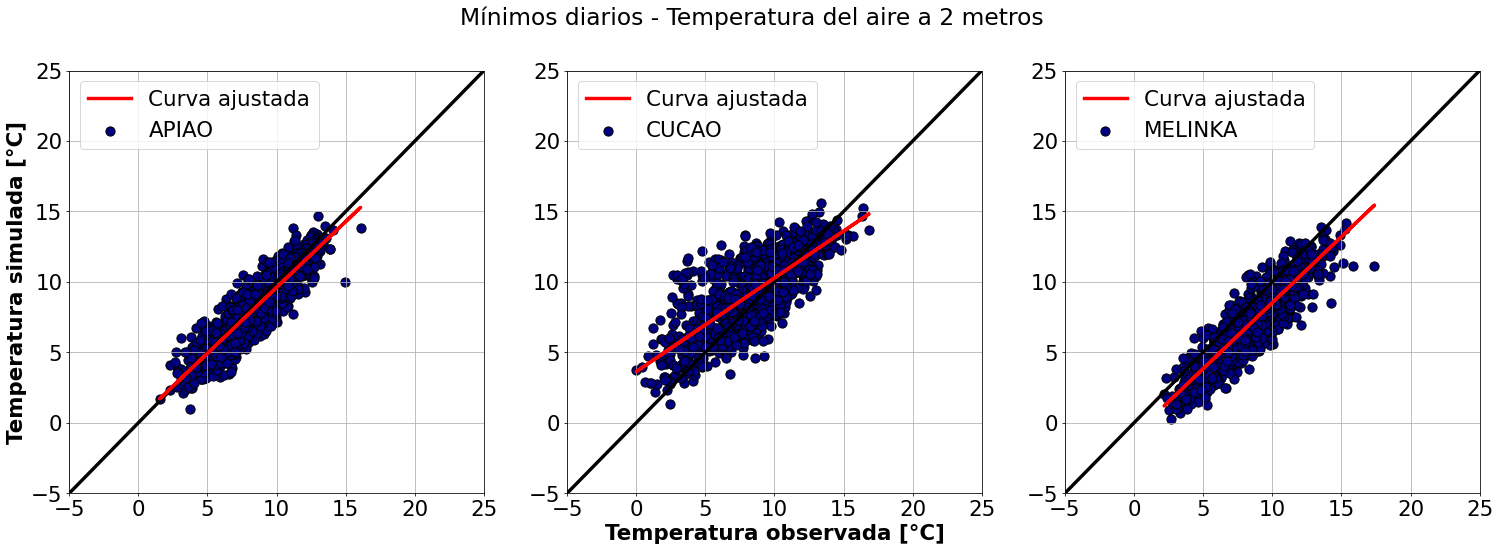

In [ ]:
# DIAGRAMAS DE DISPERSIÓN PARA LOS MÍNIMOS DIARIOS
# ======================================================================================
fig, ax = plt.subplots(1,3,figsize=(26,8),dpi=70)
fig.suptitle('Mínimos diarios - Temperatura del aire a 2 metros',x=0.5,y=0.994,fontsize=24)
# APIAO
ax[0].scatter(APIAO_diario["T2_min"], APIAO_diario["T2_WRF_min"], s=90, color='navy', edgecolor='k',label='APIAO'); # Observado vs simulado
ax[0].plot([-5,0,5,10,15,20,25],[-5,0,5,10,15,20,25],color='black',linewidth=3.5)
ax[0].plot(APIAO_Min, APIAO_MinWRF_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[0].set_ylabel('Temperatura simulada [°C]', fontsize = 22, weight='bold')
ax[0].legend(fontsize=22,loc='upper left')
ax[0].yaxis.set_major_locator(loc)
ax[0].set_xlim(-5,25);   ax[0].set_ylim(-5,25);   ax[0].grid(True)
# CUCAO
ax[1].scatter(CUCAO_diario["T2_min"], CUCAO_diario["T2_WRF_min"], s=90, color='navy', edgecolor='k',label='CUCAO'); # Observado vs simulado
ax[1].plot([-5,0,5,10,15,20,25],[-5,0,5,10,15,20,25],color='black',linewidth=3.5)
ax[1].plot(CUCAO_Min, CUCAO_MinWRF_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[1].set_xlabel('Temperatura observada [°C]', fontsize = 22, weight='bold')
ax[1].legend(fontsize=22,loc='upper left')
ax[1].yaxis.set_major_locator(loc)
ax[1].set_xlim(-5,25);   ax[1].set_ylim(-5,25);   ax[1].grid(True)
# MELINKA
ax[2].scatter(MELINKA_diario["T2_min"], MELINKA_diario["T2_WRF_min"], s=90, color='navy', edgecolor='k',label='MELINKA'); # Observado vs simulado
ax[2].plot([-5,0,5,10,15,20,25],[-5,0,5,10,15,20,25],color='black',linewidth=3.5)
ax[2].plot(MELINKA_Min, MELINKA_MinWRF_pred, color='red',label='Curva ajustada',linewidth=3.5) # Curva ajustada
ax[2].legend(fontsize=22,loc='upper left')
ax[2].yaxis.set_major_locator(loc)
ax[2].set_xlim(-5,25);   ax[2].set_ylim(-5,25);   ax[2].grid(True)
plt.savefig("scatterplot_min.png")

\begin{array}{|c|c|c|c|c|c|} \hline
\text{Mínimo diario (T2)} & \text{Pendiente } (m) & \text{Intercepto } (n) & \text{Coeficiente de determinación } (R^2) & RMSE & BIAS \\ \hline \hline
\text{APIAO} & 0.74 & 2.7 & 0.77 & 2.6 & -0.3\\
\text{CUCAO} & 0.66 & 3.6 & 0.5 & 4.6 & 0.8 \\
\text{MELINKA} & 0.93 & -0.8 & 0.49 & 3.3 & -1.4 \\ \hline 
\end{array}

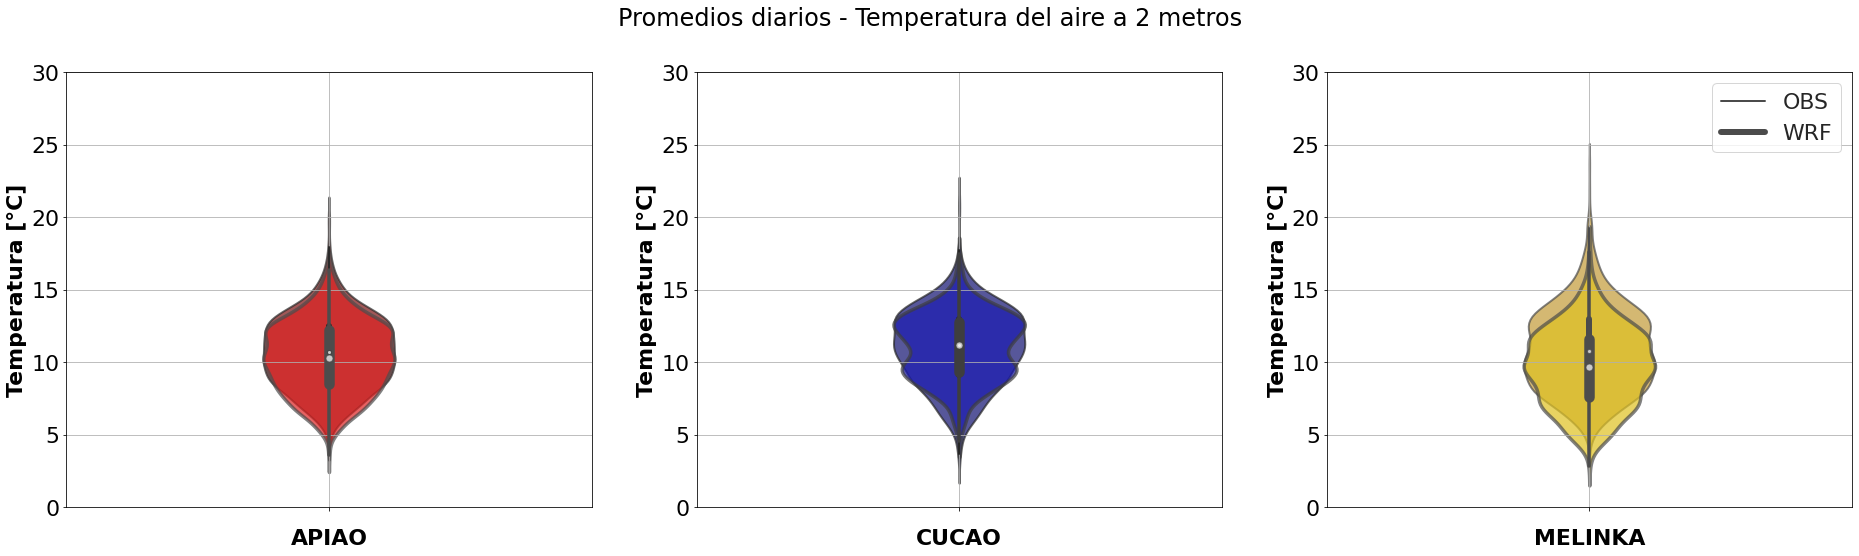

In [ ]:
# DIAGRAMAS DE VIOLÍN PARA LOS PROMEDIOS DIARIOS
# ======================================================================================
fig, ax = plt.subplots(1, 3,sharey=False)
fig.set_size_inches(32, 8)
fig.suptitle('Promedios diarios - Temperatura del aire a 2 metros',x=0.5,y=0.994,fontsize=24)
sns.set(style="whitegrid")
sns.violinplot(y = 'T2_mean', data = APIAO_diario,label='OBS',color = 'darkred', kind = "violin", inner = "box", ax = ax[0],linewidth=2,width=0.5);
plt.setp(ax[0].collections, alpha=.9)
sns.violinplot(y = 'T2_WRF_mean', data = APIAO_diario,label='WRF', color = "red", kind = 'violin', inner = "box", ax = ax[0], linewidth=3.5,width=0.5);
plt.setp(ax[0].collections, alpha=.7)
ax[0].set_title("APIAO",y=-0.1,weight='bold',fontsize=22)
ax[0].set_ylabel("Temperatura [°C]",fontsize=22, weight='bold')
ax[0].yaxis.set_major_locator(loc); ax[0].set_xlim(-1,1);   ax[0].set_ylim(0,30);   ax[0].grid(True) 
plt.rc('ytick', labelsize=22) 

sns.violinplot(y = CUCAO_diario["T2_mean"], data = CUCAO_diario, color = 'navy', kind = "violin", inner = "box", ax = ax[1],linewidth=2,width=0.5);
plt.setp(ax[1].collections, alpha=.9)
sns.violinplot(y = CUCAO_diario["T2_WRF_mean"], data = CUCAO_diario,  color = "mediumblue", kind = 'violin', inner = "box", ax = ax[1],linewidth=3.5,width=0.5);
plt.setp(ax[1].collections, alpha=.7)
ax[1].set_title("CUCAO",y=-0.1,weight='bold',fontsize=22)
ax[1].set_ylabel("Temperatura [°C]",fontsize=22, weight='bold')
ax[1].yaxis.set_major_locator(loc); ax[1].set_xlim(-1,1);   ax[1].set_ylim(0,30);   ax[1].grid(True)


g=sns.violinplot(y = MELINKA_diario["T2_mean"], data = MELINKA_diario, color ='goldenrod',  kind = "violin", inner = "box", ax = ax[2],linewidth=2,width=0.5);
plt.setp(ax[2].collections, alpha=.9)
sns.violinplot(y = MELINKA_diario["T2_WRF_mean"], data = MELINKA_diario,  color = "gold", kind = 'violin', inner = "box", ax = ax[ 2],linewidth=3.5,width=0.5);
plt.setp(ax[2].collections, alpha=.7)
ax[2].set_title("MELINKA", y=-0.1,weight='bold',fontsize=22)
ax[2].set_ylabel("Temperatura [°C]",fontsize=22, weight='bold')
ax[2].yaxis.set_major_locator(loc); ax[2].set_xlim(-1,1);   ax[2].set_ylim(0,30);   ax[2].grid(True)
g.legend(labels=['OBS', 'WRF'],fontsize=22)
plt.savefig("violin_tmean.png")


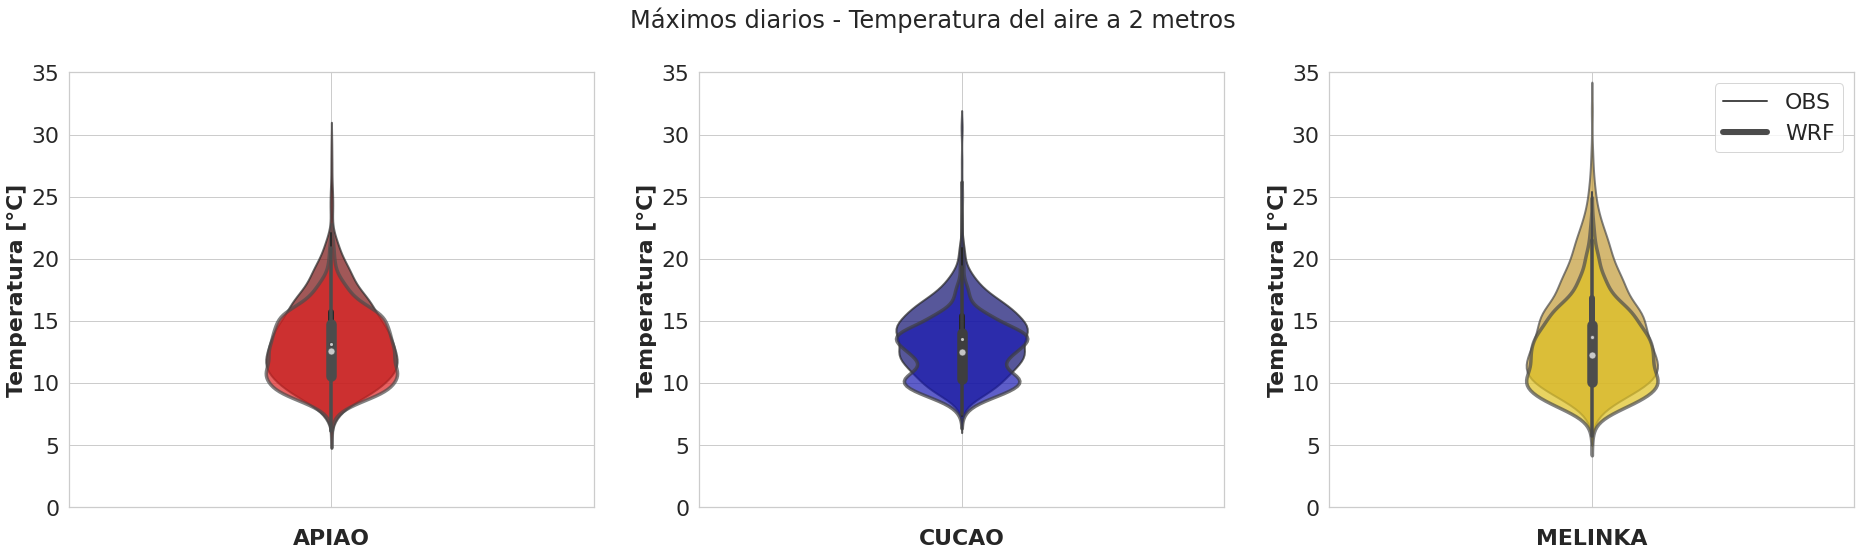

In [ ]:
# DIAGRAMAS DE VIOLÍN PARA LOS MÁXIMOS DIARIOS
# ======================================================================================
fig, ax = plt.subplots(1, 3,sharey=False)
fig.set_size_inches(32, 8)
fig.suptitle('Máximos diarios - Temperatura del aire a 2 metros',x=0.5,y=0.994,fontsize=24)
sns.set(style="whitegrid")
sns.violinplot(y = 'T2_max', data = APIAO_diario,color = 'darkred', kind = "violin", inner = "box", ax = ax[0],linewidth=2,width=0.5);
plt.setp(ax[0].collections, alpha=.9)
sns.violinplot(y = 'T2_WRF_max', data = APIAO_diario, color = "red", kind = 'violin', inner = "box", ax = ax[0], linewidth=3.5,width=0.5);
plt.setp(ax[0].collections, alpha=.7)
ax[0].set_title("APIAO",y=-0.1,weight='bold',fontsize=22)
ax[0].set_ylabel("Temperatura [°C]",fontsize=22, weight='bold')
ax[0].yaxis.set_major_locator(loc); ax[0].set_xlim(-1,1);   ax[0].set_ylim(0,35);   ax[0].grid(True) 
plt.rc('ytick', labelsize=22) 

sns.violinplot(y = CUCAO_diario["T2_max"], data = CUCAO_diario, color = 'navy', kind = "violin", inner = "box", ax = ax[1],linewidth=2,width=0.5);
plt.setp(ax[1].collections, alpha=.9)
sns.violinplot(y = CUCAO_diario["T2_WRF_max"], data = CUCAO_diario,  color = "mediumblue", kind = 'violin', inner = "box", ax = ax[1],linewidth=3.5,width=0.5);
plt.setp(ax[1].collections, alpha=.7)
ax[1].set_title("CUCAO",y=-0.1,weight='bold',fontsize=22)
ax[1].set_ylabel("Temperatura [°C]",fontsize=22, weight='bold')
ax[1].yaxis.set_major_locator(loc); ax[1].set_xlim(-1,1);   ax[1].set_ylim(0,35);   ax[1].grid(True)


g=sns.violinplot(y = MELINKA_diario["T2_max"], data = MELINKA_diario, color ='goldenrod',  kind = "violin", inner = "box", ax = ax[2],linewidth=2,width=0.5);
plt.setp(ax[2].collections, alpha=.9)
sns.violinplot(y = MELINKA_diario["T2_WRF_max"], data = MELINKA_diario,  color = "gold", kind = 'violin', inner = "box", ax = ax[ 2],linewidth=3.5,width=0.5);
plt.setp(ax[2].collections, alpha=.7)
ax[2].set_title("MELINKA", y=-0.1,weight='bold',fontsize=22)
ax[2].set_ylabel("Temperatura [°C]",fontsize=22, weight='bold')
ax[2].yaxis.set_major_locator(loc); ax[2].set_xlim(-1,1);   ax[2].set_ylim(0,35);   ax[2].grid(True)
g.legend(labels=['OBS', 'WRF'],fontsize=22)
plt.savefig("violin_tmax.png")

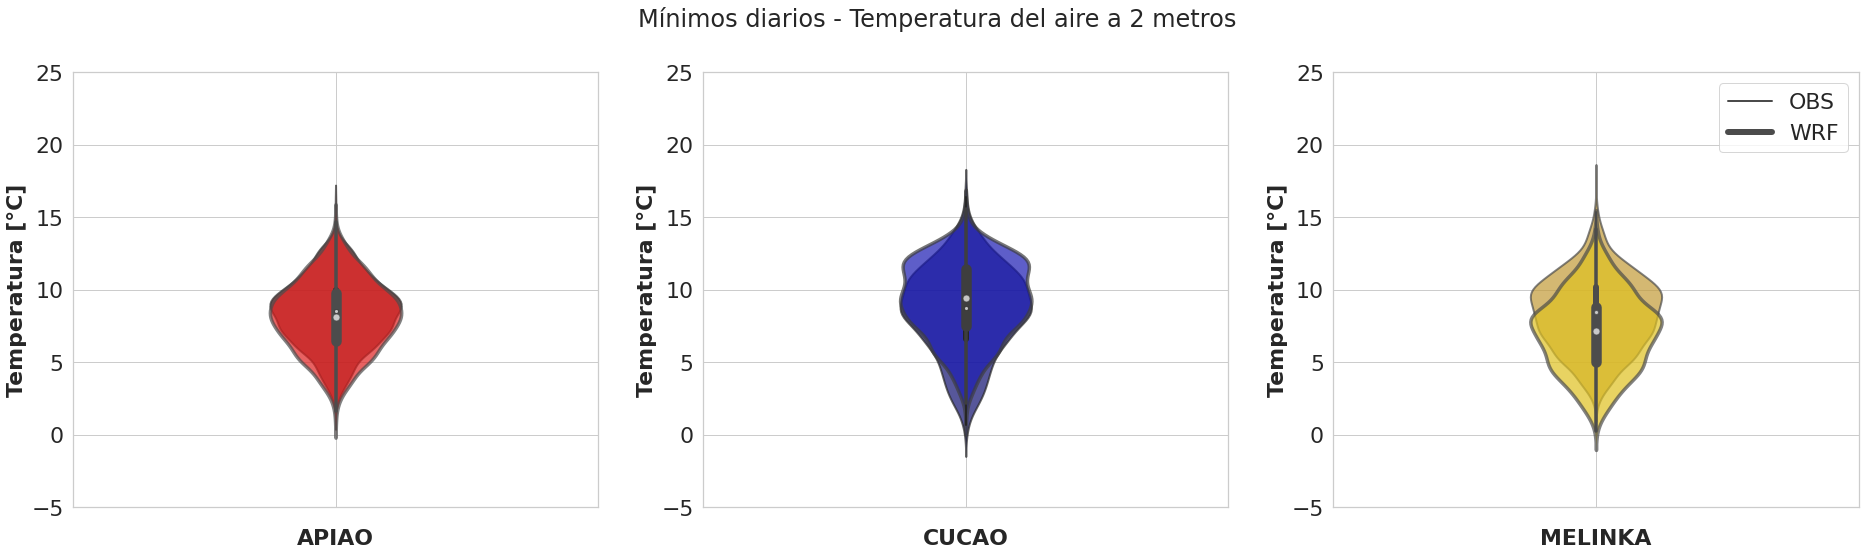

In [ ]:
# DIAGRAMAS DE VIOLÍN PARA LOS MÍNIMOS DIARIOS
# ======================================================================================
fig, ax = plt.subplots(1, 3,sharey=False)
fig.set_size_inches(32, 8)
fig.suptitle('Mínimos diarios - Temperatura del aire a 2 metros',x=0.5,y=0.994,fontsize=24)
sns.set(style="whitegrid")
sns.violinplot(y = 'T2_min', data = APIAO_diario,color = 'darkred', kind = "violin", inner = "box", ax = ax[0],linewidth=2,width=0.5);
plt.setp(ax[0].collections, alpha=.9)
sns.violinplot(y = 'T2_WRF_min', data = APIAO_diario, color = "red", kind = 'violin', inner = "box", ax = ax[0], linewidth=3.5,width=0.5);
plt.setp(ax[0].collections, alpha=.7)
ax[0].set_title("APIAO",y=-0.1,weight='bold',fontsize=22)
ax[0].set_ylabel("Temperatura [°C]",fontsize=22, weight='bold')
ax[0].yaxis.set_major_locator(loc); ax[0].set_xlim(-1,1);   ax[0].set_ylim(-5,25);   ax[0].grid(True) 
plt.rc('ytick', labelsize=22) 

sns.violinplot(y = CUCAO_diario["T2_min"], data = CUCAO_diario, color = 'navy', kind = "violin", inner = "box", ax = ax[1],linewidth=2,width=0.5);
plt.setp(ax[1].collections, alpha=.9)
sns.violinplot(y = CUCAO_diario["T2_WRF_min"], data = CUCAO_diario,  color = "mediumblue", kind = 'violin', inner = "box", ax = ax[1],linewidth=3.5,width=0.5);
plt.setp(ax[1].collections, alpha=.7)
ax[1].set_title("CUCAO",y=-0.1,weight='bold',fontsize=22)
ax[1].set_ylabel("Temperatura [°C]",fontsize=22, weight='bold')
ax[1].yaxis.set_major_locator(loc); ax[1].set_xlim(-1,1);   ax[1].set_ylim(-5,25);   ax[1].grid(True)


g=sns.violinplot(y = MELINKA_diario["T2_min"], data = MELINKA_diario, color ='goldenrod',  kind = "violin", inner = "box", ax = ax[2],linewidth=2,width=0.5);
plt.setp(ax[2].collections, alpha=.9)
sns.violinplot(y = MELINKA_diario["T2_WRF_min"], data = MELINKA_diario,  color = "gold", kind = 'violin', inner = "box", ax = ax[ 2],linewidth=3.5,width=0.5);
plt.setp(ax[2].collections, alpha=.7)
ax[2].set_title("MELINKA", y=-0.1,weight='bold',fontsize=22)
ax[2].set_ylabel("Temperatura [°C]",fontsize=22, weight='bold')
ax[2].yaxis.set_major_locator(loc); ax[2].set_xlim(-1,1);   ax[2].set_ylim(-5,25);   ax[2].grid(True)
g.legend(labels=['OBS', 'WRF'],fontsize=22)
plt.savefig("violin_tmin.png")

In [ ]:
# Para continuar con MOS de forma ordenada, se sigue en otro código ==> Regresión Lineal Múltiple